In [2]:
#DBSCAN- Density Based Spatial Clustering of Application with Noise

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/Users/ranjani/Downloads/AQ_Boston_Cam-Quincy.csv", header=0)
#data.head()
data.head()

,['location','city','country','utc','local','parameter','value','unit','latitude','longitude','attribution'],Unnamed: 11,Unnamed: 12
0,['Portsmouth','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','o3','0.035','ppm','43.075371','-70.748017',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
1,['Odiorne State Park','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','o3','0.038','ppm','43.045269','-70.713958',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
2,['Portsmouth','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','pm10','10','µg/m³','43.075371','-70.748017',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
3,['Portsmouth','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','pm25','4.8','µg/m³','43.075371','-70.748017',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
4,['LYNN','Boston-Cambridge-Quincy','US','2020-02-09T17:00:00.000Z','2020-02-09T12:00:00-05:00','no2','0.008','ppm','42.474701','-70.971901',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""Massachusetts Dept. of Environmental ..."


In [4]:
data = data.apply(lambda s:s.str.replace('\'', "").str.replace('[', ""))
data.columns = data.columns.str.strip().str.replace('[', '').str.replace(']', '').str.replace('\'','')
data.drop(data.columns[[10,11,12]], axis=1, inplace=True)
data.head()


,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,o3,0.035,ppm,43.075371,-70.748017
1,Odiorne State Park,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,o3,0.038,ppm,43.045269,-70.713958
2,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,pm10,10,µg/m³,43.075371,-70.748017
3,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,pm25,4.8,µg/m³,43.075371,-70.748017
4,LYNN,Boston-Cambridge-Quincy,US,2020-02-09T17:00:00.000Z,2020-02-09T12:00:00-05:00,no2,0.008,ppm,42.474701,-70.971901


In [5]:
data["location"] = data["location"].astype('category')
data["location"] = data["location"].cat.codes
data["local"] = data["local"].astype('category')
data["local"] = data["local"].cat.codes
data.dtypes


location       int8
city         object
country      object
utc          object
local         int16
parameter    object
value        object
unit         object
latitude     object
longitude    object
dtype: object

In [6]:
table = pd.pivot_table(data, values='value', index=['location', 'local'], columns=['parameter'], aggfunc=np.sum, fill_value=0)
table.reset_index(inplace=True)
table.columns=table.columns.str.strip()
table['co'] = table['co'].astype(float)
table['no2'] = table['no2'].astype(float)
table['o3'] = table['o3'].astype(float)
table['pm10'] = table['pm10'].astype(float)
table['pm25'] = table['pm25'].astype(float)
table['so2'] = table['so2'].astype(float)
#table['co'] = table['co'].apply(lambda x: '{:.2f}'.format(x)).astype(float)
table

parameter,location,local,co,no2,o3,pm10,pm25,so2
0,0,0,0.0,0.008,0.000,0.0,0.0,0.000
1,0,1,0.0,0.009,0.000,0.0,0.0,0.000
2,0,2,0.0,0.008,0.000,0.0,0.0,0.000
3,0,3,0.0,0.008,0.000,0.0,0.0,0.000
4,0,4,0.0,0.007,0.000,0.0,0.0,0.000
5,0,5,0.0,0.011,0.000,0.0,0.0,0.000
6,0,6,0.0,0.014,0.000,0.0,0.0,0.000
7,0,7,0.0,0.009,0.000,0.0,0.0,0.000
8,0,8,0.0,0.009,0.000,0.0,0.0,0.000
9,0,9,0.0,0.009,0.000,0.0,0.0,0.000


In [15]:
X = table.iloc[:,[4,5]].values

Text(0, 0.5, 'PM10')

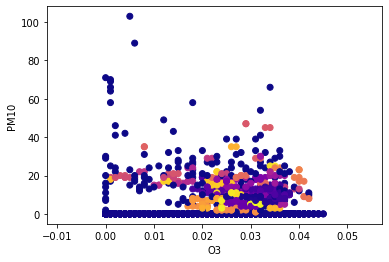

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("O3")
plt.ylabel("PM10")